# 실습 전 설정

In [67]:
import sys
assert sys.version_info>=(3, 5)

import sklearn
assert sklearn.__version__>="0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True,legend=False, plot_training=True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2=ListedColormap(['#7d7d58','#4c4c7f','#507d70'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$",fontsize=18)
        plt.ylabel(r"$x_2$",fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right",fontsize=14)
        
PROJECT_ROOT_DIR="."
CHAPTER_ID="decision_trees"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

from sklearn.tree import DecisionTreeClassifier

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension,dpi=resolution)

# 성능 측정 - 적정 최소 샘플 개수: 57

In [75]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#데이터셋 생성
Xm, ym=make_moons(n_samples=1000,noise=0.4,random_state=53)
#훈련 셋, 테스트 셋 나누기
X_train,X_test,y_train,y_test=train_test_split(Xm,ym,test_size=0.2,random_state=42)

deep_tree_clf=DecisionTreeClassifier(min_samples_leaf=57, random_state=42)
deep_tree_clf.fit(X_train,y_train)

y_pred=deep_tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.86

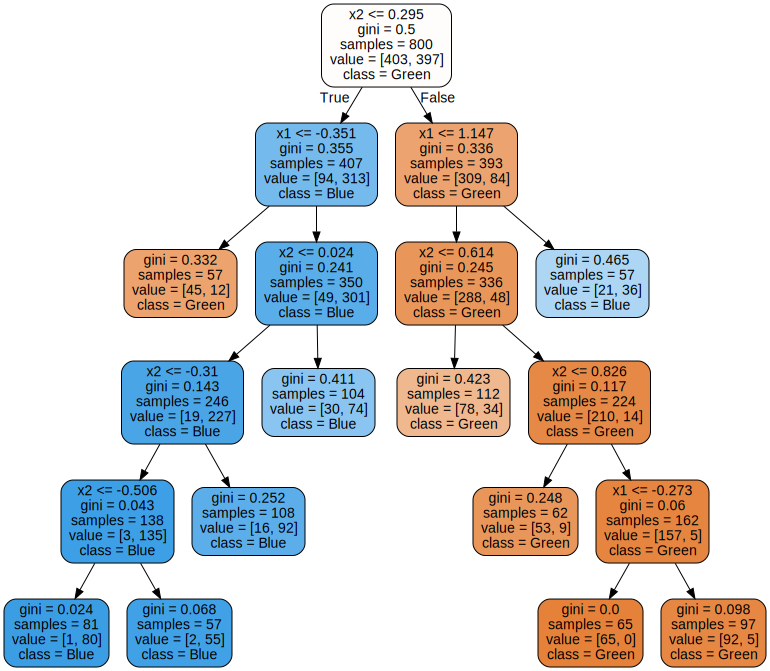

In [76]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(deep_tree_clf,
               out_file=os.path.join(IMAGES_PATH,"moons_tree.dot"),
               feature_names=["x1","x2"],
               class_names=["Green","Blue"],
               rounded=True,
               filled=True)
Source.from_file(os.path.join(IMAGES_PATH,"moons_tree.dot"))

그림 저장: min_samples_leaf_plot


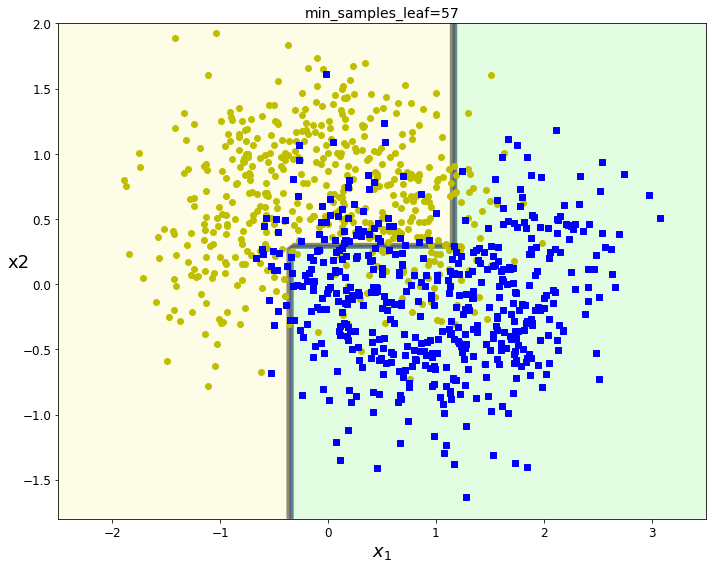

In [77]:
fig, axes=plt.subplots(figsize=(10,8))
plot_decision_boundary(deep_tree_clf,Xm,ym,axes=[-2.5,3.5,-1.8,2],iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf.min_samples_leaf),fontsize=14)
plt.ylabel("x2")

save_fig("min_samples_leaf_plot")
plt.show()